In [1]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np

import imutils
import cv2
import matplotlib.pyplot as plt

In [2]:
def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

In [3]:
image_path = "./test_image/blue_small_far.jpg"

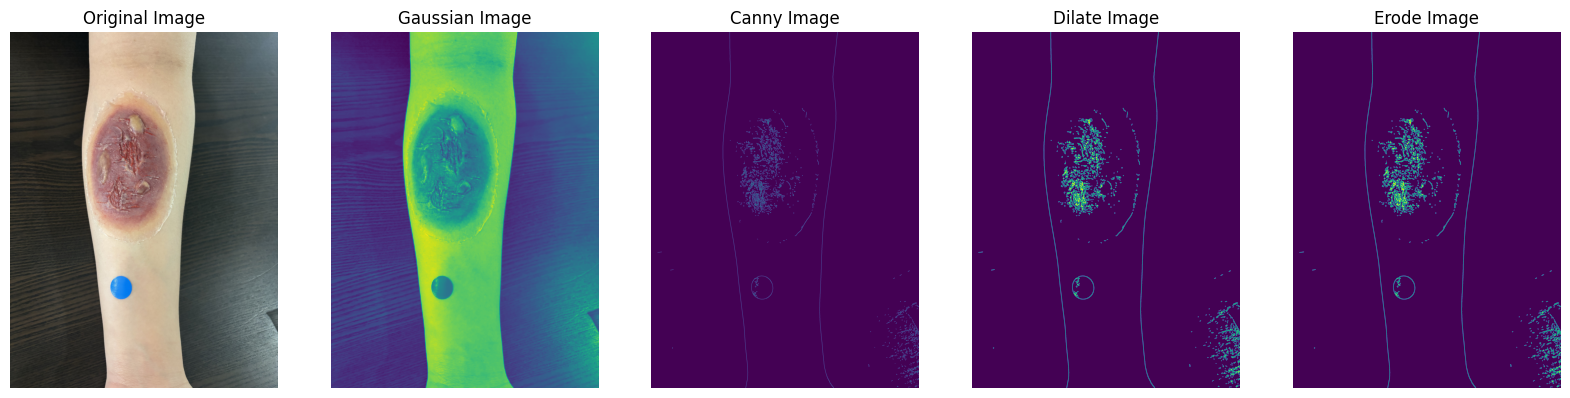

In [4]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(image_path)
# remove_image = remove(image)
# image = remove(image)

plt.figure(figsize=(20,15))
plt.subplot(1,5,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0) # gaussian Blur 적용

plt.subplot(1,5,2)
plt.title("Gaussian Image")
plt.imshow(np.array(gray))
plt.axis('off')

# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
# 영상의 외곽선 추출 (영상, threshold1, threshold2) # threshold2에 연결된 선을 길게 적용
edged = cv2.Canny(gray, 70, 100) 
plt.subplot(1,5,3)
plt.title("Canny Image")
plt.imshow(np.array(edged))
plt.axis('off')

# 이진 영상의 팽창 연산
edged = cv2.dilate(edged, None, iterations=1)
plt.subplot(1,5,4)
plt.title("Dilate Image")
plt.imshow(np.array(edged))
plt.axis('off')

# 이진 영상의 침식 연산
# edged = cv2.erode(edged, None, iterations=1)
plt.subplot(1,5,5)
plt.title("Erode Image")
plt.imshow(np.array(edged))
plt.axis('off')

# 외곽선 검출
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, 
	cv2.CHAIN_APPROX_SIMPLE)

cnts = imutils.grab_contours(cnts)
# sort the contours from left-to-right and initialize the
# 'pixels per metric' calibration variable

if len(cnts) > 0:
	(cnts, _) = contours.sort_contours(cnts)

(-0.5, 2447.5, 3263.5, -0.5)

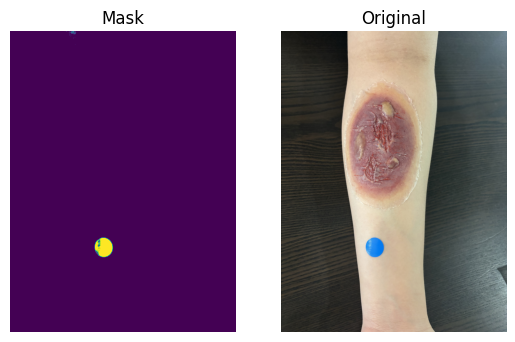

In [5]:
# 이미지 읽기
image = cv2.imread(image_path)

# BGR에서 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 파란색의 HSV 범위 정의
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])


# 범위 내의 색상만 추출하는 마스크 생성
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# 범위 내의 색상만 추출하는 마스크 생성
mask = cv2.inRange(hsv, lower_blue, upper_blue)
plt.subplot(1,2,1)
plt.title("Mask")
plt.imshow(mask)
plt.axis('off')

# 결과 이미지를 생성
res = cv2.bitwise_and(image, image, mask=mask)

# 컨투어 찾기
cnts, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# contours = cnts[0]

# 원형 컨투어 감지
for contour in cnts:
    approx = cv2.approxPolyDP(contour, 0.01*cv2.arcLength(contour, True), True)
    area = cv2.contourArea(contour)
    if len(approx) > 8 and area > 100000:
        print(area)
        cv2.drawContours(image, [contour], 0, (0, 255, 0), 5)

    break

# 결과 이미지 보여주기
plt.subplot(1,2,2)
plt.title("Original")
plt.imshow(cv2.cvtColor(np.array(image), cv2.COLOR_BGR2RGB))
plt.axis('off')

# cnts = imutils.grab_contours(cnts)
# # sort the contours from left-to-right and initialize the
# # 'pixels per metric' calibration variable

# if len(cnts) > 0:
# 	(cnts, _) = contours.sort_contours(cnts)

In [6]:
# loop over the contours individually
for c in cnts:
	if cv2.contourArea(c) < 100000:
		continue

	approx = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True)
	area = cv2.contourArea(c)

	if len(approx) < 8:
		continue
	else:
		cv2.drawContours(image, [contour], 0, (0, 255, 0), 5)
		
		# compute the rotated bounding box of the contour
		orig = image.copy()
		box = cv2.minAreaRect(c)
		box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
		box = np.array(box, dtype="int")
		# order the points in the contour such that they appear
		# in top-left, top-right, bottom-right, and bottom-left
		# order, then draw the outline of the rotated bounding
		# box
		box = perspective.order_points(box)
		cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
		# loop over the original points and draw them
		for (x, y) in box:
			cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)


		# unpack the ordered bounding box, then compute the midpoint
		# between the top-left and top-right coordinates, followed by
		# the midpoint between bottom-left and bottom-right coordinates
		(tl, tr, br, bl) = box
		print(tl, tr, br, bl)
		(tltrX, tltrY) = midpoint(tl, tr)
		(blbrX, blbrY) = midpoint(bl, br)
		# compute the midpoint between the top-left and top-right points,
		# followed by the midpoint between the top-righ and bottom-right
		(tlblX, tlblY) = midpoint(tl, bl)
		(trbrX, trbrY) = midpoint(tr, br)
		# draw the midpoints on the image
		cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
		# draw lines between the midpoints
		cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
			(255, 0, 255), 2)
		cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
			(255, 0, 255), 2)


		# compute the Euclidean distance between the midpoints
		dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
		dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))
		# if the pixels per metric has not been initialized, then
		# compute it as the ratio of pixels to supplied metric
		# (in this case, inches)

		long_distance = dB if dA <= dB else dA
		print(long_distance)
		pixelsPerMetric = 1.6 / long_distance

		# compute the size of the object
		dimA = dA * pixelsPerMetric
		dimB = dB * pixelsPerMetric

		# draw the object sizes on the image
		cv2.putText(orig, "{:.1f}cm".format(dimA),
			(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
			3, (0, 0, 0), 3)
		cv2.putText(orig, "{:.1f}cm".format(dimB),
			(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
			3, (0, 0, 0), 3)
		# show the output image

		plt.figure(figsize=(20, 10))
		plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
		plt.axis('off')


In [7]:
plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))

NameError: name 'orig' is not defined

In [8]:
image_path = "./test_image/blue_small_close.jpg"

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1.6
1.5098591549295775


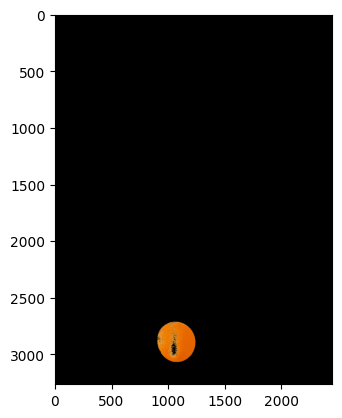

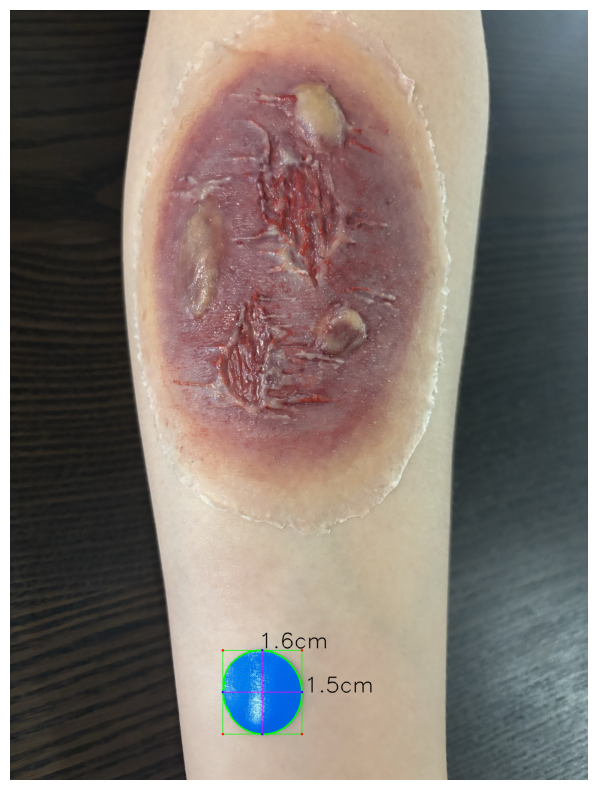

In [9]:
# 이미지 읽기
image = cv2.imread(image_path)

# BGR에서 HSV로 변환
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 파란색의 HSV 범위 정의
lower_blue = np.array([100, 150, 0])
upper_blue = np.array([140, 255, 255])


# 범위 내의 색상만 추출하는 마스크 생성
mask = cv2.inRange(hsv, lower_blue, upper_blue)
print(mask)

# 결과 이미지를 생성
res = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(res)
# 컨투어 찾기
cnts = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# print(f"find:{cnts}")

cnts = imutils.grab_contours(cnts)

(cnts, _) = contours.sort_contours(cnts)


for c in cnts:
	if cv2.contourArea(c) < 10000: # 범위 크기 지정
		continue

	approx = cv2.approxPolyDP(c, 0.01*cv2.arcLength(c, True), True) # 외곽선 근사 하기

	if len(approx) < 8:
		continue
	else:
		cv2.drawContours(image, [c], 0, (0, 255, 0), 5)
		
		orig = image.copy()
		box = cv2.minAreaRect(c) # contour 최소 bbox 크기 설정
		box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box) # 박스 좌표 순서 추출 좟아단, 우상단, 우하단, 좌하단
		box = np.array(box, dtype="int") # np.array int형으로 변경

		# box = perspective.order_points(box)
		cv2.drawContours(orig, [box], -1, (0, 255, 0), 2) # bbox 그리기
		
		# bbox 그리기
		for (x, y) in box: 
			cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)


		# 좌상단, 우상단, 우하단, 좌하단 box 나누기
		(tl, tr, br, bl) = box
		(tltrX, tltrY) = midpoint(tl, tr) # Top left, Top right의 중간값
		(blbrX, blbrY) = midpoint(bl, br) # Bottom Left, Bottom Right의 중간값

		# followed by the midpoint between the top-righ and bottom-right
		(tlblX, tlblY) = midpoint(tl, bl) # Top left, bottom left의 중간값
		(trbrX, trbrY) = midpoint(tr, br) # Top Right, bottom right의 중간값
		
		# draw the midpoints on the image
		cv2.circle(orig, (int(tltrX), int(tltrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(blbrX), int(blbrY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(tlblX), int(tlblY)), 5, (255, 0, 0), -1)
		cv2.circle(orig, (int(trbrX), int(trbrY)), 5, (255, 0, 0), -1)
		# draw lines between the midpoints
		cv2.line(orig, (int(tltrX), int(tltrY)), (int(blbrX), int(blbrY)),
			(255, 0, 255), 2)
		cv2.line(orig, (int(tlblX), int(tlblY)), (int(trbrX), int(trbrY)),
			(255, 0, 255), 2)


		# compute the Euclidean distance between the midpoints
		# 거리 구하기
		dA = dist.euclidean((tltrX, tltrY), (blbrX, blbrY))
		dB = dist.euclidean((tlblX, tlblY), (trbrX, trbrY))

		long_distance = dB if dA <= dB else dA # 장축 길이 구하기
		
		pixelsPerMetric = 1.6 / long_distance

		# compute the size of the object
		dimA = dA * pixelsPerMetric
		dimB = dB * pixelsPerMetric

		# draw the object sizes on the image
		cv2.putText(orig, "{:.1f}cm".format(dimA),
			(int(tltrX - 15), int(tltrY - 10)), cv2.FONT_HERSHEY_SIMPLEX,
			3, (0, 0, 0), 3)
		cv2.putText(orig, "{:.1f}cm".format(dimB),
			(int(trbrX + 10), int(trbrY)), cv2.FONT_HERSHEY_SIMPLEX,
			3, (0, 0, 0), 3)
		# show the output image

		plt.figure(figsize=(20, 10))
		plt.imshow(cv2.cvtColor(orig, cv2.COLOR_BGR2RGB))
		plt.axis('off')

print(dimA)
print(dimB)

# Segmentation Mask

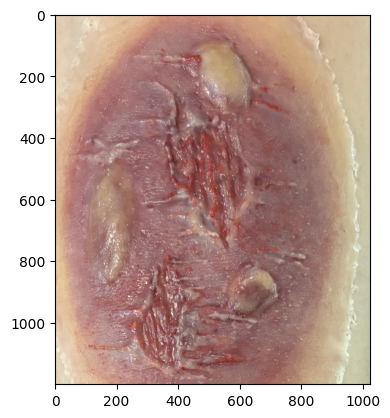

In [10]:
image_path = "./test_image/blue_small.jpg"
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

x, y, w, h = 340*2, 204*2, 511*2, 600*2
image = image[y:y+h, x:x+w, ...]
plt.imshow(image)

In [11]:
print(pixelsPerMetric)

0.004507042253521127
